## Lab 3 Report

Jan Silva, Jared Yen, Stefan Smigoc, Khoa Tran

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal


## Summary

In this lab, we examine how to perform convolutions in python with delta functions and unit step functions. We plot the results of these convolutions, and then finally use convolution to manipulate audio files and realign a specific audio clip. 

## Assignment 1 - Convolving Signals

<IPython.core.display.Javascript object>


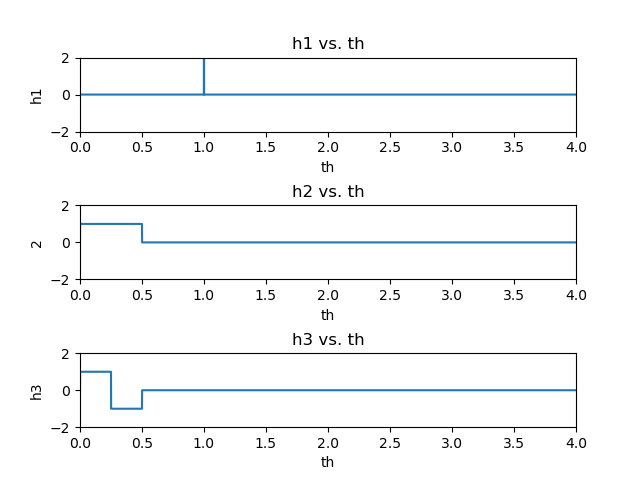

<IPython.core.display.Javascript object>


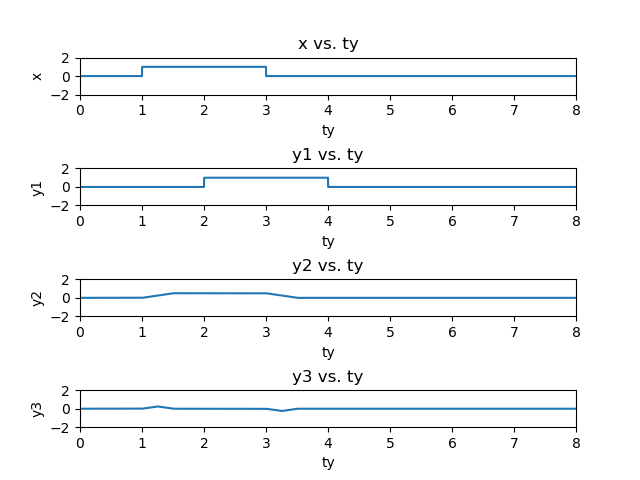

Text(0, 0.5, 'y3')

In [8]:
# Assignment 1 - Convolving Signals 

# Part A
def u(t):
    return 1.0*(t>0)

fs = 1000
t = np.arange(0,4+1/fs,1/fs)
x = u(t-1)-u(t-3)

impulse1 = int(1*fs)
h1 = np.zeros(len(t))
h1[impulse1]=fs

h2 = u(t)-u(t-0.5)

h3 = u(t)-2*u(t-0.25)+u(t-0.5)
    
# Part B
th = np.arange(0,4+1/fs,1/fs)

fig1 = plt.figure()
fig1.subplots_adjust(hspace=1.0,wspace=0.5)

plt.subplot(3,1,1)
plt.plot(th, h1)
plt.xlim(0,4)
plt.ylim(-2,2)
plt.title('h1 vs. th')
plt.xlabel('th')
plt.ylabel('h1')

plt.subplot(3,1,2)
plt.plot(th, h2)
plt.xlim(0,4)
plt.ylim(-2,2)
plt.title('h2 vs. th')
plt.xlabel('th')
plt.ylabel('2')

plt.subplot(3,1,3)
plt.plot(th, h3)
plt.xlim(0,4)
plt.ylim(-2,2)
plt.title('h3 vs. th')
plt.xlabel('th')
plt.ylabel('h3')

# Part C
y1 = np.convolve(x,h1)/fs
y2 = np.convolve(x,h2)/fs
y3 = np.convolve(x,h3)/fs

# Part D
ty = np.arange(0,8+3/fs,1/fs)

if (len(x) != len(ty)):
    x = np.concatenate([x, np.zeros(len(ty)-len(x))])

fig2 = plt.figure()
fig2.subplots_adjust(hspace=2.0,wspace=0.5)

plt.subplot(4,1,1)
plt.plot(ty, x)
plt.xlim(0,8)
plt.ylim(-2,2)
plt.title('x vs. ty')
plt.xlabel('ty')
plt.ylabel('x')

plt.subplot(4,1,2)
plt.plot(ty, y1)
plt.xlim(0,8)
plt.ylim(-2,2)
plt.title('y1 vs. ty')
plt.xlabel('ty')
plt.ylabel('y1')

plt.subplot(4,1,3)
plt.plot(ty, y2)
plt.xlim(0,8)
plt.ylim(-2,2)
plt.title('y2 vs. ty')
plt.xlabel('ty')
plt.ylabel('y2')

plt.subplot(4,1,4)
plt.plot(ty, y3)
plt.xlim(0,8)
plt.ylim(-2,2)
plt.title('y3 vs. ty')
plt.xlabel('ty')
plt.ylabel('y3')

### Discussion 

Changing fs would change the number of points in each graph, so for fs = 10, there would be less points than if fs = 1000. The graph of y2 and y3 are found by flipping the graphs of h2 and h3 and sliding them along the time axis, finding the overlap with x. The maximum value of y2 corresponds to the maximum positive overlap of x and h2, which occurs from t = 1.5 to 3. The maximum value of y3 corresponds to the maximum positive overlap of x and h3. y3 is found by flipping h3, thus causing the positive portion of h3 to overlap with x first. This corresponds to the maximum value of y3, and the minimum value of y3 corresponds to the maximum negative overlap between x and h3.  

### Assignment 2 - Revisitng Time Delay Transformation

<IPython.core.display.Javascript object>


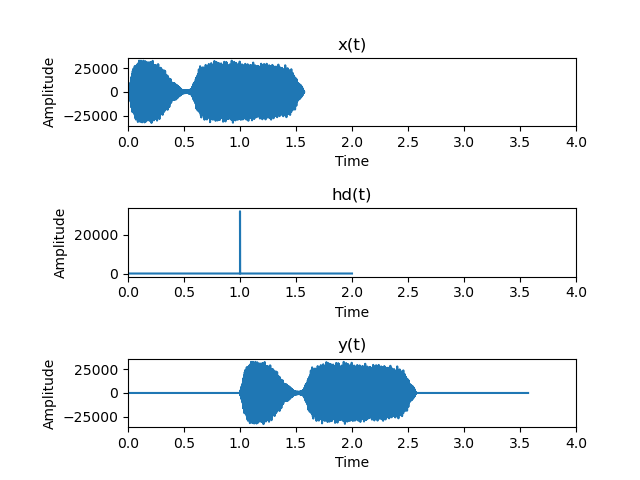

In [9]:
# Assignment 2 - Revisiting TIme Delay Transformation

# Part A
fs, x = wav.read('train32.wav')
t_x = np.arange(0,len(x),1)*1/fs

# Part B
t0 = 1

def delta(t, fs):
    return fs*np.concatenate([[0], np.diff(u(t))])

t_h = np.arange(0, 2+1/fs, 1/fs)
hd = delta(t_h - 1, fs)

# Part C
y = np.convolve(x, hd)/fs
t_y = np.arange(0, len(y))/fs

# Part D
plt.figure(3).subplots_adjust(hspace=1.2, left=0.2)
plt.subplot(311)
plt.plot(t_x, x)
plt.xlim(0, 4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('x(t)')

plt.subplot(312)
plt.plot(t_h, hd)
plt.xlim(0, 4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('hd(t)')

plt.subplot(313)
plt.plot(t_y, y)
plt.xlim(0, 4)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('y(t)')
plt.show()

### Discussion 

The output signal y(t) would have higher amplitude, scaled up by the sampling frequency. If we didn't scale by sampling time, the peak of y(t) would be higher and the sound would be much louder. 

### Assignment 3 - Audio File Realignment


In [10]:
# Assignment 3 - Audio File Realignment

# Part A
fs, x1 = wav.read('s1_1.wav')
fs, x2 = wav.read('s1_2.wav')
fs, x3 = wav.read('s1_3.wav')
x1 = x1[:,0]
x2 = x2[:,0]
x3 = x3[:,0]
# Part B
t = np.arange(0, 3, 1/fs)
h1 = delta(t - 1, fs)
h2 = delta(t/10, fs)
h3 = delta(t - 2, fs)
# Part C
y1 = np.convolve(x1, h1)/fs
y2 = np.convolve(x2, h2)/fs
y3 = np.convolve(x3, h3)/fs
y1 = np.concatenate([y1, np.zeros(len(y3)-len(y1))])
y2 = np.concatenate([y2, np.zeros(len(y3)-len(y2))])
# Part D
y = y1 + y2 + y3
y = y.astype('int16')
play_obj = sa.play_buffer(y, 1, 2, fs)
play_obj.wait_done()
wav.write('result.wav', fs, y)

### Report Discussion 

If x2(t) was put into all three filters, the result would just be the same portion of the clip repeated 3 times. 

The character is Buzz Lightyear from Toy Story.